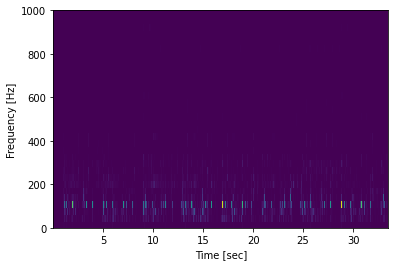

In [1]:
from masking_analysis.sound import Sound
s = Sound.sound_from_wav("/home/kanecunningham/PycharmProjects/pinniped_lab/test_data/sample.wav")
s.plot_spectrogram()

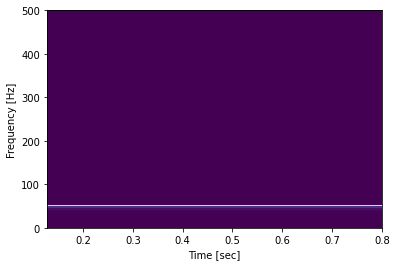

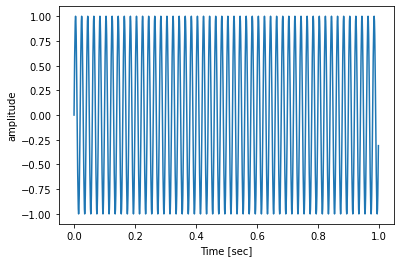

In [1]:
from masking_analysis.sound import Sound
from masking_analysis.protos import sound_pb2, sound_generation_pb2

sound_gen_config = sound_generation_pb2.SoundGenConfig()
sound_gen_config.fs = 1000
sound_gen_config.duration = 1
sound_gen_config.pure_tone_config.center_freq = 50
sound = Sound.sound_from_gen_config(sound_gen_config)
sound.plot_spectrogram()
sound.plot_time_series()